<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/1101_power_coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Programming

## Fibonacci

In [ ]:
import matplotlib.pyplot as plt

def testIt(fun, vals=[5, 10, 15, 20, 25]):
    res = []
    for n in vals:
        x = %timeit -o fun(n)
        res.append(sum(x.timings)/len(x.timings))
        print(res[-1])

    plt.plot(res)

$$
F(n) = \begin{cases}
0 & n = 0\\
1 & n = 1\\
F(n - 1) + F(n - 2) & n > 1
\end{cases}
$$

### The best fibonacci

In [ ]:
def bestFibonacci(n):
    t1, t2 = 0, 1
    for i in range(n):
        t1, t2 = t2, t1 + t2

    return t1

In [ ]:
bestFibonacci(20)

6765

589 ns ± 9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
5.892477118571832e-07
879 ns ± 115 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
8.7858485742858e-07
1.25 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.2466755672857225e-06
1.57 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.5678257634285565e-06
1.88 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.88016997014282e-06


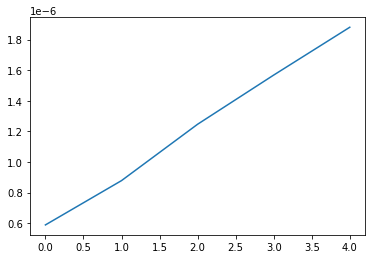

In [ ]:
testIt(bestFibonacci)

In [ ]:
def worstFibonacci(n):
    if n < 2:
        return n
    else:
        return worstFibonacci(n-1) + worstFibonacci(n-2)

In [ ]:
worstFibonacci(20)

6765

2.19 µs ± 211 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.1893309257142976e-06
21.4 µs ± 371 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.1401468885713778e-05
237 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
0.00023708626271430996
2.65 ms ± 51.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.0026474262985714506
29.4 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.02943220434285487


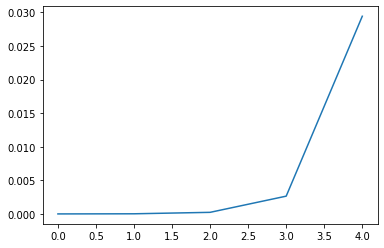

In [ ]:
testIt(worstFibonacci)

In [ ]:
def bottomUpDPFibonacci(n):
    T = [-1]*(n+1)
    T[0] = 0
    T[1] = 1
    def _f(x):
        if T[x] == -1:
            T[x] = _f(x-1) + _f(x-2)
        return T[x]

    return _f(n)

In [ ]:
bottomUpDPFibonacci(20)

6765

2.98 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.9790328614292e-06
3.9 µs ± 56.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.904520407143082e-06
5.7 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.70078843857118e-06
7.47 µs ± 80.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.471137662856953e-06
9.21 µs ± 17.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.207111211428259e-06


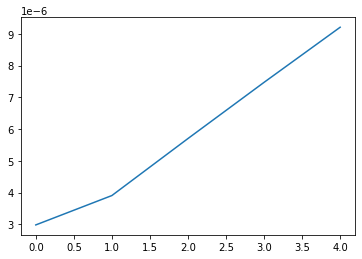

In [ ]:
testIt(bottomUpDPFibonacci)

In [ ]:
def topDownDPFibonacci(n):
    T = [-1]*(n+1)
    T[0] = 0
    T[1] = 1
    for i in range(2, n+1):
        T[i] = T[i-1] + T[i-2]

    return T[n] 

In [ ]:
topDownDPFibonacci(20)

6765

1.12 µs ± 9.65 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.1239936522856623e-06
1.86 µs ± 8.98 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.860977500285701e-06
2.69 µs ± 44.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.6933035985705697e-06
3.56 µs ± 33.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.557870912857522e-06
4.34 µs ± 77.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.344632940000598e-06


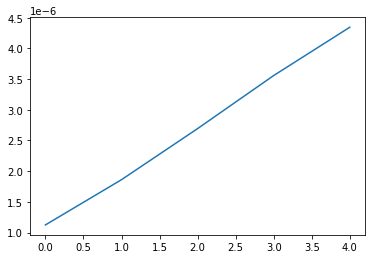

In [ ]:
testIt(topDownDPFibonacci)

## Coins

$$
C(n) = \begin{cases}
0 & n = 0\\
1 + min([C(n-di)]) & n > 0, \forall di \le n
\end{cases}
$$

In [ ]:
def testCoins(func, d, c=[10, 20, 30, 40, 50]):
    res = []
    for n in c:
        x = %timeit -o func(n, d)
        res.append(sum(x.timings)/len(x.timings))
        print(res[-1])

    plt.plot(res) 

### Greedy coins

In [ ]:
def greedyCoins(c, d):
    coins = []
    nc = 0
    for di in reversed(d):
        if di <= c:
            coins.append((c // di, di))
            nc += coins[-1][0]
            c = c % di
    return nc, coins

In [ ]:
d = [1, 5, 10, 20, 50]

In [ ]:
greedyCoins(40, d)

(2, [(2, 20)])

In [ ]:
greedyCoins(87, d)

(6, [(1, 50), (1, 20), (1, 10), (1, 5), (2, 1)])

604 ns ± 7.14 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
6.03805322714298e-07
596 ns ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
5.955819365714368e-07
736 ns ± 7.51 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
7.360268514285541e-07
595 ns ± 8.58 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
5.950303074285525e-07
597 ns ± 6.97 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
5.974738370000036e-07


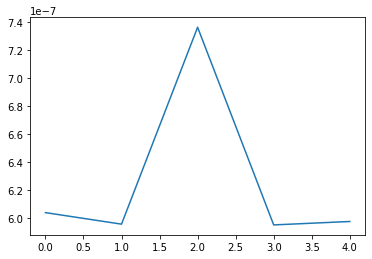

In [ ]:
testCoins(greedyCoins, d)

### Naive recursive

In [ ]:
def naiveCoins(c, d):
    if c == 0:
        return 0
    temp = []
    for di in d:
        if di <= c:
            temp.append(naiveCoins(c - di, d))
    return 1 + min(temp)

In [ ]:
naiveCoins(40, d)

2

In [ ]:
naiveCoins(40, [1, 5, 10, 20 , 25, 50])

2

18.1 µs ± 56.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.8082763949999907e-05
403 µs ± 6.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
0.0004029856031428543
8.74 ms ± 78.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.00874097456142863
187 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.1874510373285716
4.02 s ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.015128388857144


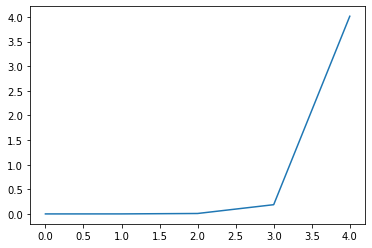

In [ ]:
testCoins(naiveCoins, d)

### Dynamic Programming Coins

#### Top Down

In [ ]:
import math

def dpCoins(c, d):
    T = [-1]*(c+1)
    T[0] = 0
    S = [0]*(c+1)
    for i in range(1, c+1):
        m = math.inf
        s = -1
        for di in d:
            if di > i: break
            if T[i - di] < m:
                m = T[i - di]
                s = di
        T[i] = 1 + m
        S[i] = s

    return T, S

In [ ]:
c = 87
T, S = dpCoins(c, d)
print(f"Number of coins {T[c]}")
while c > 0:
    print(S[c])
    c -= S[c]

Number of coins 6
1
1
5
10
20
50


In [ ]:
c = 40
T, S = dpCoins(c, [1, 5, 10, 20, 25, 50])
print(f"Number of coins {T[c]}")
while c > 0:
    print(S[c])
    c -= S[c]

Number of coins 2
20
20


4.44 µs ± 92.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.437195139999922e-06
9.46 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.464685637142664e-06
15.2 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.5202827785714133e-05
21.4 µs ± 648 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.1420715800000573e-05
26.7 µs ± 790 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.6712010257144165e-05


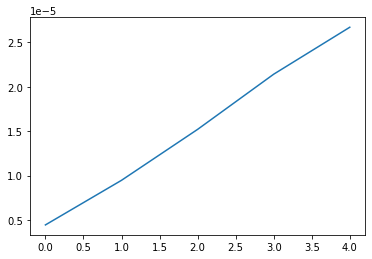

In [ ]:
testCoins(dpCoins, d)

In [ ]:
import math

def dpbuCoins(c, d):
    T = [-1]*(c+1)
    T[0] = 0
    S = [0]*(c+1)
    
    def f(n):
        m = math.inf
        s = 0
        for di in d:
            if di > n: break
            if T[n - di] == -1:
                f(n - di)
            if T[n - di] < m:
                m = T[n - di]
                s = di
        T[n] = 1 + m
        S[n] = s

    f(c)

    return T, S

In [ ]:
c = 40
T, S = dpbuCoins(c, d)
print(T)
print(S)

[0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 3, 4, 5, 6, 7, 2]
[0, 1, 1, 1, 1, 5, 1, 1, 1, 1, 10, 1, 1, 1, 1, 5, 1, 1, 1, 1, 20, 1, 1, 1, 1, 5, 1, 1, 1, 1, 10, 1, 1, 1, 1, 5, 1, 1, 1, 1, 20]


6.1 µs ± 45.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.095953851428736e-06
13.8 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.3779261568571266e-05
22.1 µs ± 498 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.208155220000013e-05
31.4 µs ± 428 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.136422981427976e-05
39.6 µs ± 869 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.9579882157142624e-05


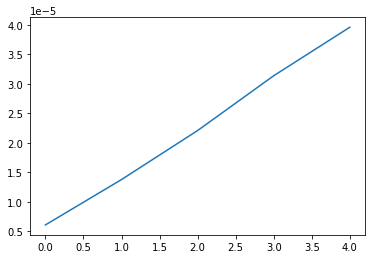

In [ ]:
testCoins(dpbuCoins, d)